# Projet sur la performance d'une entreprise 

### Objectif
#### 1. Quel est le mois durant lequel, il y eu le meilleur chiffre d'Affaire ?

#### 2. Dans quelle ville nous avons enregistrer le maximum de commande ?

#### 3. En quel moment nous pouvons lancer des campagnes publicitaires pour avoir plus de vente ?

#### 4. Quel est le produit qui se vend le plus ?

In [104]:
# Importation des packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [105]:
# Importation des données 
files = [file for file in os.listdir(r'E:\Projet_perso\Fichiers-Vente-Boutiques-main\Fichiers-Vente-Boutiques-main\data-sales-main')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [137]:
# Combiner tout dans un dataframe
path = r'E:\Projet_perso\Fichiers-Vente-Boutiques-main\Fichiers-Vente-Boutiques-main\data-sales-main'

df_final = pd.DataFrame()
for file in files:
    df_inter = pd.read_csv(path+ '/' + file)
    df_final = pd.concat([df_final, df_inter])

In [124]:
df_final.to_csv(path+'/df_final.csv', index = False)

In [125]:
df_final.describe(include='all').T

,count,unique,top,freq
Order ID,186305,178438,Order ID,355
Product,186305,20,USB-C Charging Cable,21903
Quantity Ordered,186305,10,1,168552
Price Each,186305,24,11.95,21903
Order Date,186305,142396,Order Date,355
Purchase Address,186305,140788,Purchase Address,355


#### 1. Quel est le mois durant lequel, il y eu le meilleur chiffre d'Affaire ?

In [126]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [127]:
df_final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [128]:
df_final.shape

(186850, 6)

In [138]:
# Valeur manquantes
df_final.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [139]:
# Sppression des valeurs manquantes
df_final.dropna(how="all", inplace= True)

In [140]:
# Après suppression
df_final.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [132]:
df_final.shape

(186305, 6)

In [141]:
# Conversion des dates avec gestion des erreurs
df_final["Order Date"] = pd.to_datetime(df_final["Order Date"], errors="coerce")

# Supprimer les lignes où "Order Date" est invalide
df_final = df_final.dropna(subset=["Order Date"])

# Extraire le mois et l'ajouter comme une nouvelle colonne
df_final["month"] = df_final["Order Date"].dt.month


C:\Users\Mr CISSE\AppData\Local\Temp\ipykernel_12528\2314595704.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_final["Order Date"] = pd.to_datetime(df_final["Order Date"], errors="coerce")


In [142]:
# Afficher le dataframe avec une nouvelle colonne mois
df_final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [144]:
df_final["Quantity Ordered"] = df_final["Quantity Ordered"].astype(int)

In [145]:
df_final["Price Each"] = df_final["Price Each"].astype("float")

In [146]:
df_final["Order ID"] = df_final["Order ID"].astype("int64")

In [147]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   month             185950 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(2)
memory usage: 9.9+ MB


In [148]:
# Le chiffre d'affaire de chaque mois
df_final["Chiffre d'Affaire"] = df_final["Quantity Ordered"] * df_final["Price Each"]

In [149]:
df_final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Chiffre d'Affaire
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [153]:
# Faire un groupeby par mois pour determiner le mois avec le grand chiffre d'affaire
df_final.groupby("month")["Chiffre d'Affaire"].sum()

month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Chiffre d'Affaire, dtype: float64

Text(0.5, 1.0, "Chiffre d'affaire par mois (ordre décroissant)")

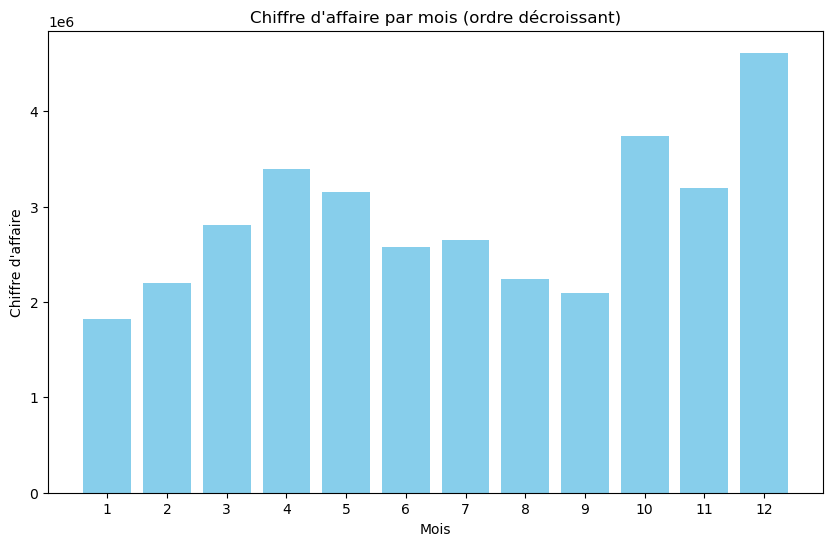

In [199]:
months = range(1,13)
# Grouper les données par mois et calculer le chiffre d'affaire
vente_mois = df_final.groupby("month")["Chiffre d'Affaire"].sum()

# Trier les données par ordre décroissant du chiffre d'affaire
monthly_sales_sorted = vente_mois.sort_values(ascending=True)

# Tracer le barplot
plt.figure(figsize=(10, 6))
plt.bar(vente_mois.index, vente_mois.values, color="skyblue")
plt.xticks(vente_mois.index)
plt.xlabel("Mois")
plt.ylabel("Chiffre d'affaire")
plt.title("Chiffre d'affaire par mois (ordre décroissant)")

On constate que le mois qui faire le plus de vendre est le mois de Décembre et en général les période de fêtes c'est-à-dire Octobre, Novembre et Décembre et les périodes qui font les moins de vendre est les période après les fêtes


#### 2. Dans quelle ville nous avons enregistrer le maximum de commande ?


In [165]:
def ville(v):
    return v.split(",")[1].strip()

In [ ]:
# Extraction des villes dans la colonne adress
df_final["Ville"] = df_final["Purchase Address"].apply(ville)

In [168]:
df_final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Chiffre d'Affaire,Ville
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [170]:
df_final["Ville"].unique()

array(['Dallas', 'Boston', 'Los Angeles', 'San Francisco', 'Seattle',
       'Atlanta', 'New York City', 'Portland', 'Austin'], dtype=object)

In [176]:
# Comptons le nombres de commande par ville 
df_final.groupby("Ville")["Ville"].count()

Ville
Atlanta          14881
Austin            9905
Boston           19934
Dallas           14820
Los Angeles      29605
New York City    24876
Portland         12465
San Francisco    44732
Seattle          14732
Name: Ville, dtype: int64

In [195]:
# Grouper les données par "Ville" et compter le nombre d'occurrences
grouped_data = df_final.groupby("Ville")["Ville"].count().reset_index(name="Nombre d'Occurrences")

# Trier les données par "Nombre d'Occurrences" dans l'ordre croissant
sorted_data = grouped_data.sort_values(by="Nombre d'Occurrences", ascending=True)

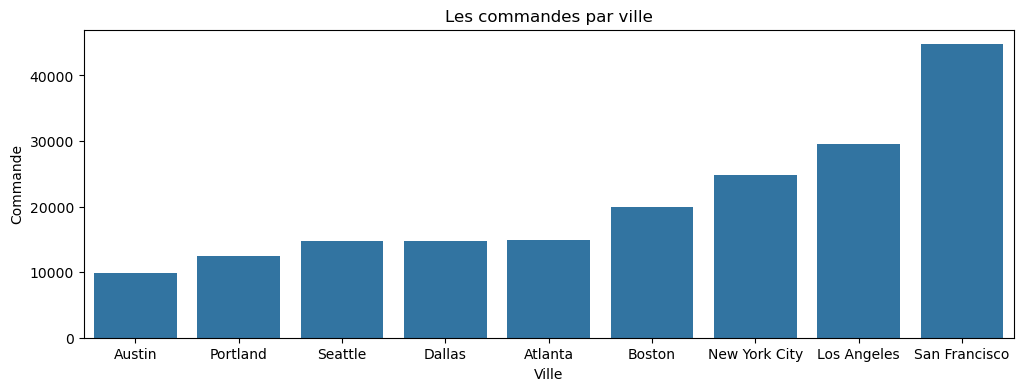

In [196]:
# Visualisarion des commandes par ville
plt.figure(figsize=(12,4))
sns.barplot(data=sorted_data, x= "Ville", y="Nombre d'Occurrences")
plt.ylabel("Commande")
plt.title("Les commandes par ville");

La ville qui enregistre le plus de commande est la ville de San Francisco suivi de Los Angeles 

In [189]:
# Grouper les données par "Ville" et sommer le "Chiffre d'Affaire"
grouped_data = df_final.groupby("Ville")["Chiffre d'Affaire"].sum().reset_index()

# Trier les données par "Chiffre d'Affaire" dans l'ordre croissant
sorted_data = grouped_data.sort_values(by="Chiffre d'Affaire", ascending=True)


In [190]:
sorted_data

,Ville,Chiffre d'Affaire
1,Austin,1819581.75
6,Portland,2320490.61
8,Seattle,2747755.48
3,Dallas,2767975.40
0,Atlanta,2795498.58
2,Boston,3661642.01
5,New York City,4664317.43
4,Los Angeles,5452570.80
7,San Francisco,8262203.91


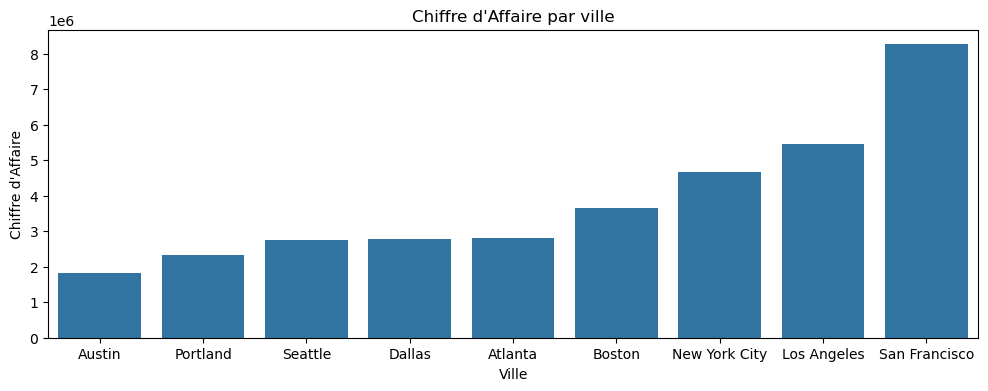

In [192]:
plt.figure(figsize=(12,4))
sns.barplot(data=sorted_data, x="Ville", y="Chiffre d'Affaire")
plt.title("Chiffre d'Affaire par ville");

### On constate que la ville de San Franscico qui faire une meilleure performance en terme de chiffre d'affaire


#### 3. En quel moment nous pouvons lancer des campagnes publicitaires pour avoir plus de vente ?

In [200]:
# Extraction des heures
df_final["heure"] = df_final["Order Date"].dt.hour

In [201]:
df_final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Chiffre d'Affaire,Ville,heure
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [209]:
# Le nombre de vente par heure 
keys = []
heure = []
for key, heur in df_final.groupby("heure"):
    keys.append(key)
    heure.append(len(heur))


In [211]:
vente_heure = {"heure": keys, "Nombre de vente": heure}

In [ ]:
vente_heure_df = pd.DataFrame(vente_heure)

In [226]:
# Trier les données par heure
vente_heure_df = vente_heure_df.sort_values("heure")

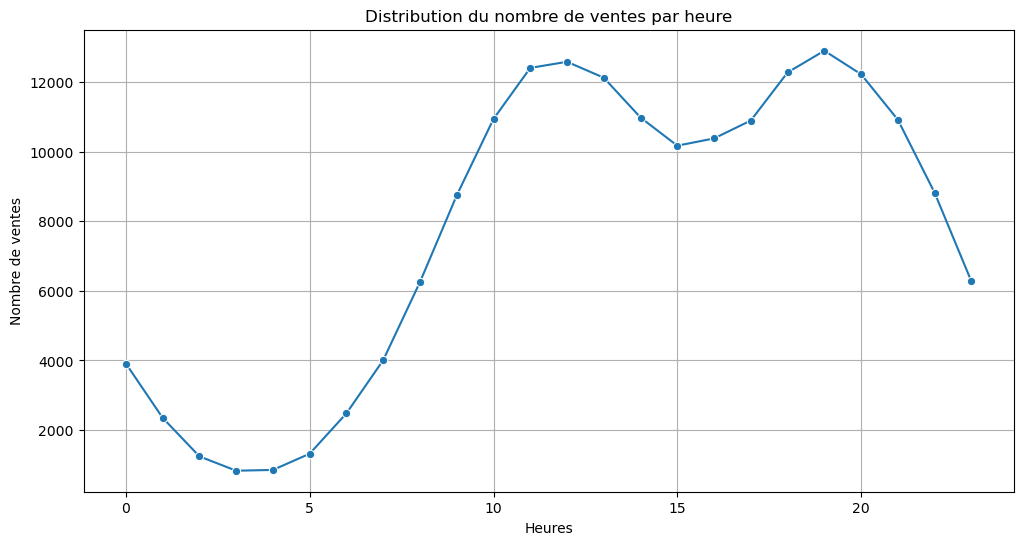

In [228]:
# Tracer le graphique avec lineplot
plt.figure(figsize=(12, 6))  # Taille du graphique
sns.lineplot(
    x="heure", 
    y="Nombre de vente", 
    data=vente_heure_df, 
    marker="o",  # Ajout de points pour plus de visibilité
    color="tab:blue" ) # Couleur de la ligne
# Ajouter des libellés, un titre et une grille
plt.grid()
plt.xlabel("Heures")
plt.ylabel("Nombre de ventes")
plt.title("Distribution du nombre de ventes par heure");


La meilleure période pour faire une campagne publicitaire est de le faire entre 15h et 18h pour avoir plus de gain

#### 4. Quel est le produit qui se vend le plus ?

In [229]:
df_final.groupby("Product")["Quantity Ordered"].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

In [ ]:
# Grouper les données par "Product" et compter le nombre d'occurrences
groupe_produit = df_final.groupby("Product")["Quantity Ordered"].sum().reset_index(name="Nombre de quantité")

# Trier les données par "Nombre d'Occurrences" dans l'ordre decroissant
sorted_data = groupe_produit.sort_values(by="Nombre de quantité", ascending=True)

In [236]:
sorted_data

,Product,Nombre de quantité
10,LG Dryer,646
11,LG Washing Machine,666
16,Vareebadd Phone,2068
0,20in Monitor,4129
14,ThinkPad Laptop,4130
13,Macbook Pro Laptop,4728
8,Flatscreen TV,4819
9,Google Phone,5532
3,34in Ultrawide Monitor,6199
1,27in 4K Gaming Monitor,6244


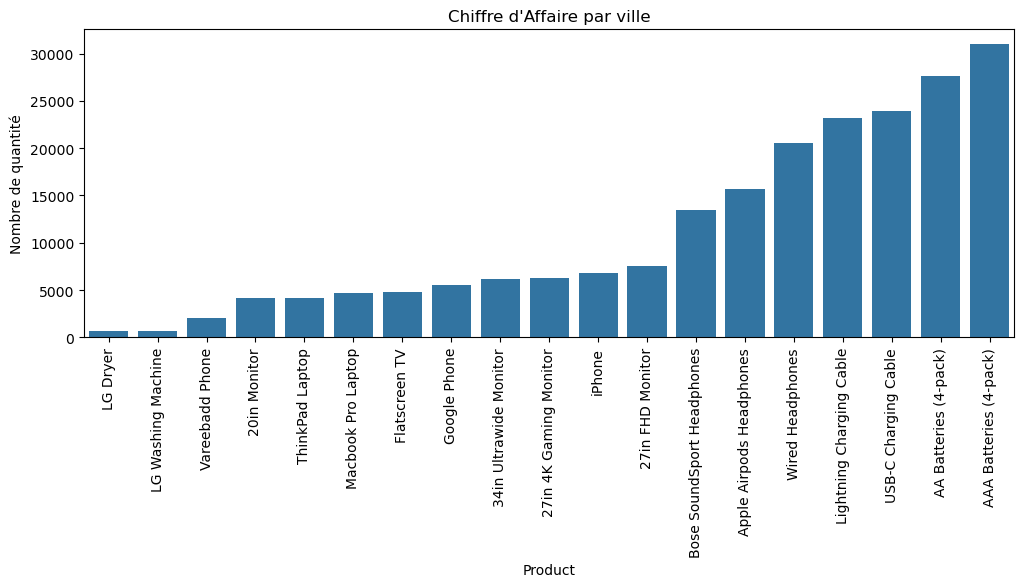

In [238]:
plt.figure(figsize=(12,4))
sns.barplot(data=sorted_data, x="Product", y="Nombre de quantité")
plt.title("Chiffre d'Affaire par ville")
plt.xticks(rotation = 90);

On constate que les produits qui se vendent me plus sont les batteries 